# Video Games Sales Analysis

In [46]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [47]:
# Read data (Video_Games_Sales_as_at_22_Dec_2016.csv)
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [48]:
df_clean = df.copy()

In [49]:
df_clean.columns = map(str.lower, df_clean.columns)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [50]:
df_clean.user_score.value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [51]:
df_clean.user_score.replace('tbd', None, inplace = True)

In [52]:
df_clean.user_score.value_counts()

7.8    388
8.2    337
8      333
7.5    293
8.3    292
      ... 
1.5      2
0.3      2
1.1      2
9.6      2
0        1
Name: user_score, Length: 95, dtype: int64

In [53]:
df_clean['user_score'] = df_clean['user_score'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       8760 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [54]:
df_clean.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         7959
user_count         9129
developer          6623
rating             6769
dtype: int64

In [55]:
df_clean.dropna(inplace=True)

In [56]:
df_clean.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
critic_score       0
critic_count       0
user_score         0
user_count         0
developer          0
rating             0
dtype: int64

In [57]:
df_clean.to_csv('Video_Games_Sales_as_at_22_Dec_2016-master.csv')

In [58]:
video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016-master.csv')

# Univariate Exploration

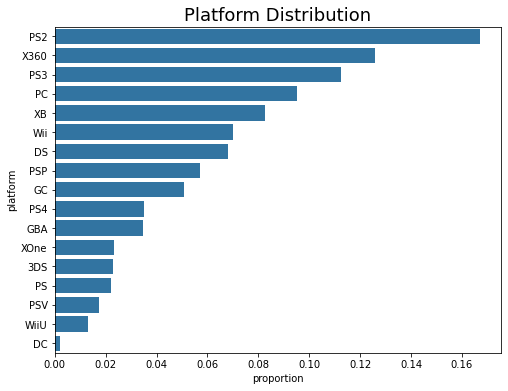

In [59]:
# Plot paltform dist
platform_counts = video_games_df.platform.value_counts()
platform_order = platform_counts.index

max_platform_count = platform_counts[0]
max_platform_prop = max_platform_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_platform_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'platform', color = base_color, order = platform_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Platform Distribution', fontsize= 18);

> 16% of the games we have in our dataset are on Play Station 2.

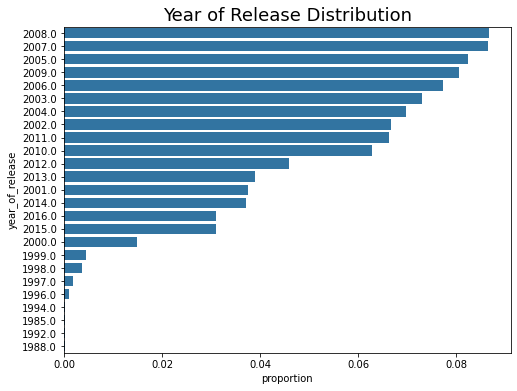

In [60]:
# Plot year_of_release dist
year_counts = video_games_df.year_of_release.value_counts()
year_order = year_counts.index
max_year_count = year_counts[year_counts.idxmax()]
max_year_prop = max_year_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_year_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'year_of_release', color = base_color, order = year_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Year of Release Distribution', fontsize= 18);

> The dataset consists mostly of gamnes that released before 2011.

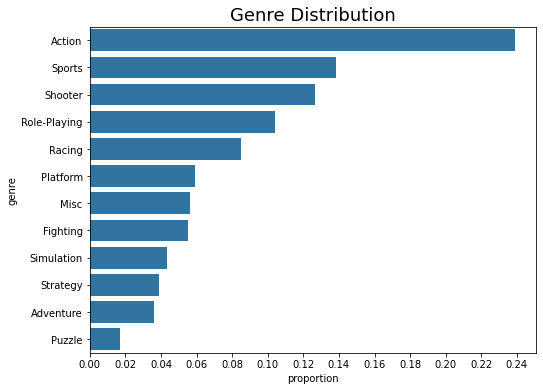

In [61]:
# Plot genre dist
genre_counts = video_games_df.genre.value_counts()
genre_order = genre_counts.index

max_genre_count = genre_counts[genre_counts.idxmax()]
max_genre_prop = max_genre_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_genre_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'genre', color = base_color, order = genre_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Genre Distribution', fontsize= 18);

> Most games have action in them.

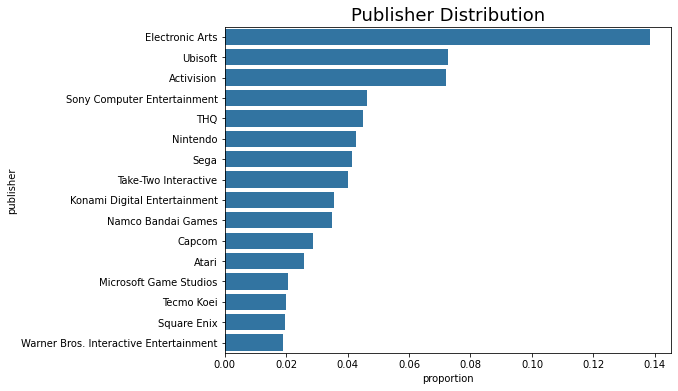

In [62]:
# Plot publisher dist
publisher_counts = video_games_df.publisher.value_counts()
publisher_order = publisher_counts.index

max_publisher_count = publisher_counts[0]
max_publisher_prop = max_publisher_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_publisher_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'publisher', color = base_color, order = publisher_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Publisher Distribution', fontsize= 18);
plt.ylim(15.5,-0.5);

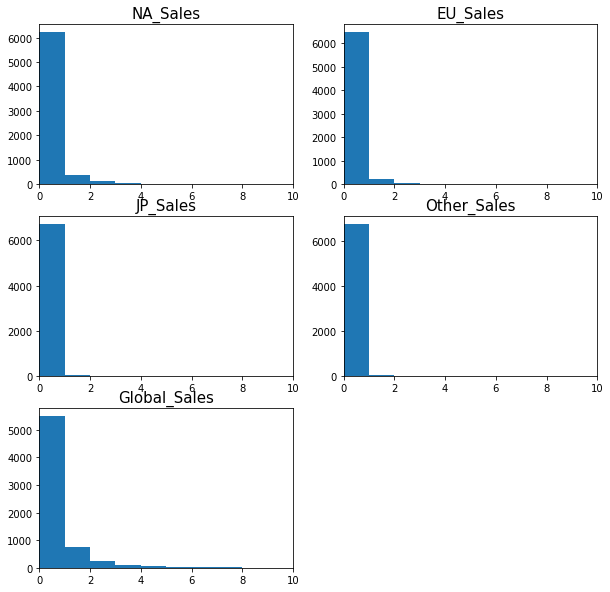

In [63]:
plt.figure(figsize = [10, 10])
# Plot na_sales
plt.subplot(3,2,1)
plt.title('NA_Sales', fontsize=15)
bins = np.arange(0,video_games_df.na_sales.max())
plt.hist(data=video_games_df, x='na_sales', bins = bins);
plt.xlim(0,10)


# Plot eu_sales
plt.subplot(3,2,2)
plt.title('EU_Sales', fontsize=15)
bins = np.arange(0,video_games_df.eu_sales.max())
plt.hist(data=video_games_df, x='eu_sales', bins = bins);
plt.xlim(0,10);

# Plot jp_sales
plt.subplot(3,2,3)
plt.title('JP_Sales', fontsize=15)
bins = np.arange(0,video_games_df.jp_sales.max())
plt.hist(data=video_games_df, x='jp_sales', bins = bins);
plt.xlim(0,10);

# Plot jp_sales
plt.subplot(3,2,4)
plt.title('Other_Sales', fontsize=15)
bins = np.arange(0,video_games_df.other_sales.max())
plt.hist(data=video_games_df, x='other_sales', bins = bins);
plt.xlim(0,10);

# Plot global_sales
plt.subplot(3,2,5)
plt.title('Global_Sales', fontsize=15)
bins = np.arange(0,video_games_df.global_sales.max())
plt.hist(data=video_games_df, x='global_sales', bins = bins);
plt.xlim(0,10);


> From the visuals above we can see that majority of games don't even break the 1 million milestone in sales.

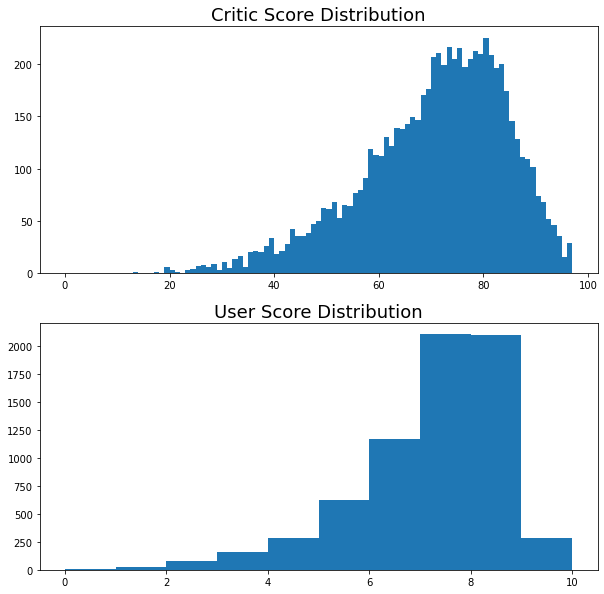

In [64]:
plt.figure(figsize = [10, 10])

# Plot cirtic_score
plt.subplot(2, 1, 1)
plt.title('Critic Score Distribution', fontsize = 18)
bins = np.arange(0,video_games_df.critic_score.max())
plt.hist(data=video_games_df, x='critic_score', bins = bins);

# Plot user_score
plt.subplot(2, 1, 2)
plt.title('User Score Distribution', fontsize = 18)
bins = np.arange(0,video_games_df.user_score.max()+1)
plt.hist(data=video_games_df, x='user_score', bins = bins);



> Critic score and user score are very similar.

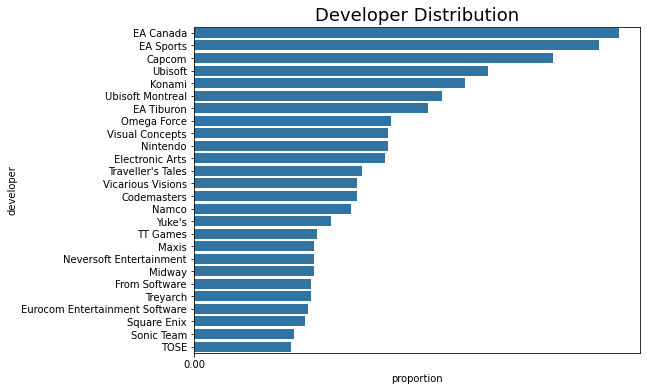

In [65]:
dev_counts = video_games_df.developer.value_counts()
dev_order = dev_counts.index

max_dev_count = dev_counts[0]
max_dev_prop = max_dev_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_dev_prop+0.02, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, y = 'developer', color = base_color, order = dev_order)
plt.xticks(tick_props * video_games_df.shape[0], tick_names)
plt.xlabel('proportion');
plt.title('Developer Distribution', fontsize= 18);
plt.ylim(25.5,-0.5);

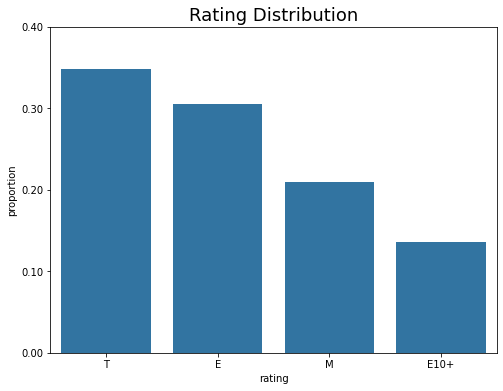

In [66]:
rating_counts = video_games_df.rating.value_counts()
rating_order = rating_counts.index

max_rating_count = rating_counts[0]
max_rating_prop = max_rating_count/video_games_df.shape[0]

base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_rating_prop+0.1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data = video_games_df, x = 'rating', color = base_color, order = rating_order)
plt.yticks(tick_props * video_games_df.shape[0], tick_names)
plt.ylabel('proportion');
plt.title('Rating Distribution', fontsize= 18);
plt.xlim(-0.5,3.5);

> Almost 35% of the games in the dataset have the T(for teens) rating. 

# Bivariate Exploration

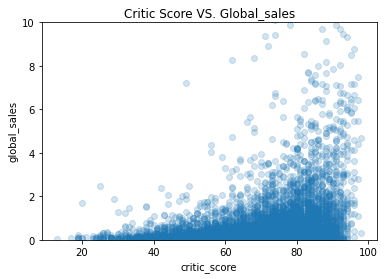

In [67]:
# Scatter plot for  critic_score vs. global_sales 
sb.regplot(fit_reg=False, data=video_games_df, x='critic_score', y='global_sales', scatter_kws={'alpha':1/5});
plt.ylim(0,10)
plt.title('Critic Score VS. Global_sales');

> There is a positive relashionship between critics score and global sales.

> Hence, I would say that critics score does have an imapact on global sales.

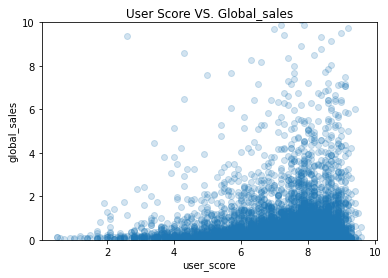

In [68]:
# Scatter plot for  user_score vs. global_sales 
sb.regplot(fit_reg=False, data=video_games_df, x='user_score', y='global_sales', scatter_kws={'alpha':1/5});
plt.ylim(0,10)
plt.title('User Score VS. Global_sales');

> There is a positive relashionship between users score and global sales.

> Hence, I would say that users score does have an imapact on global sales.

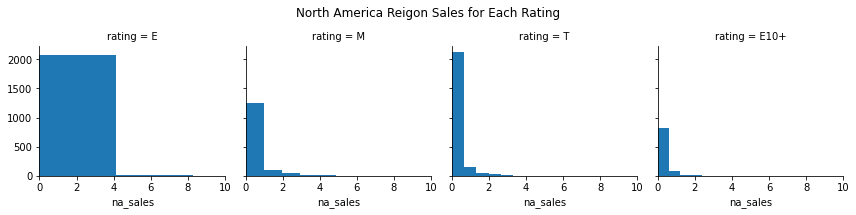

In [69]:
# Datframe for ratings in(T, E, M, E10+)
ratings_df = video_games_df.query('rating == "T" or rating == "M" or rating == "E" or rating == "E10+"')

# Plot na_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10), )
g.map(plt.hist, 'na_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('North America Reigon Sales for Each Rating');


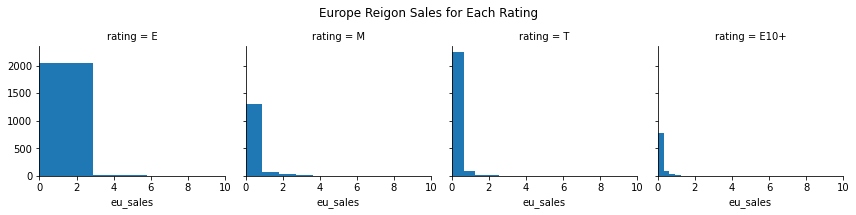

In [70]:
# Plot eu_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'eu_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Europe Reigon Sales for Each Rating');

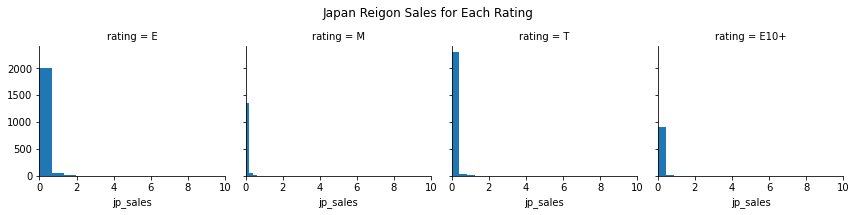

In [71]:
# Plot jp_sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'jp_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Japan Reigon Sales for Each Rating');

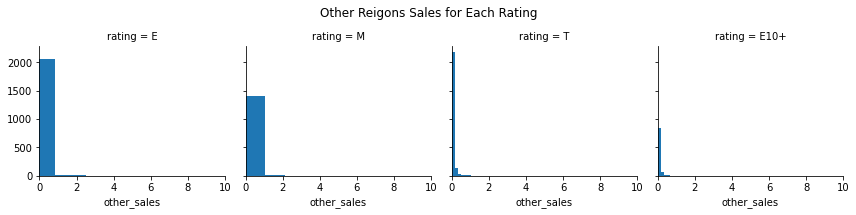

In [72]:
# Plot other regions sales for each rating
g = sb.FacetGrid(data=ratings_df, col='rating', xlim = (0,10))
g.map(plt.hist, 'other_sales');
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Other Reigons Sales for Each Rating');

> From the visiuals above we can see that, Rating E(for everyone) sells the most in all regions.

> The games that have an M(for mature) rating sells the most in regions other than(NA, EU, JP)

> The games that have an T(for teens) rating sells the most in the NA region.

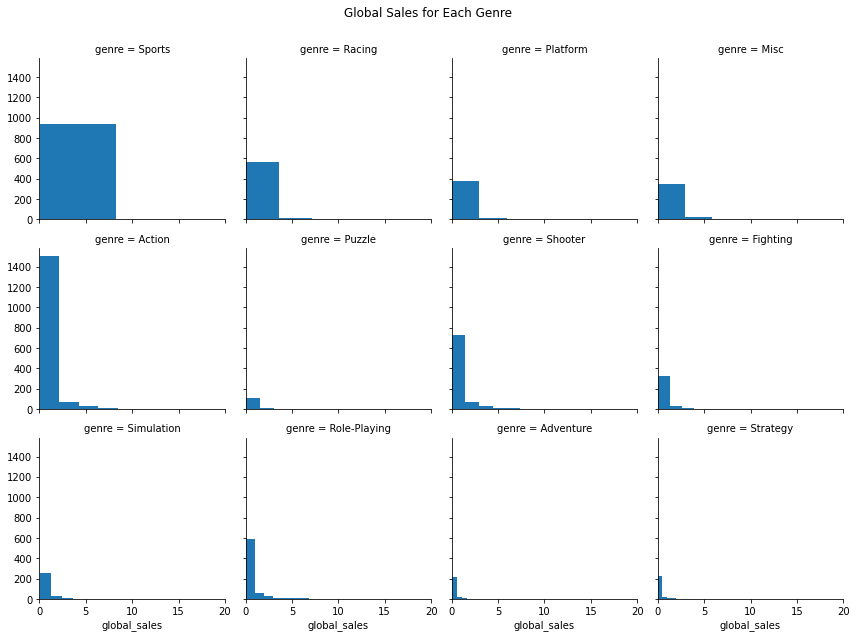

In [73]:
g = sb.FacetGrid(data=video_games_df, col='genre', col_wrap=4, xlim=(0,20))
g.map(plt.hist, 'global_sales');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Global Sales for Each Genre');

> Sports, Action, and Racing games sell the most globally.

> Puzzle, and Strategy games sell the least globally.

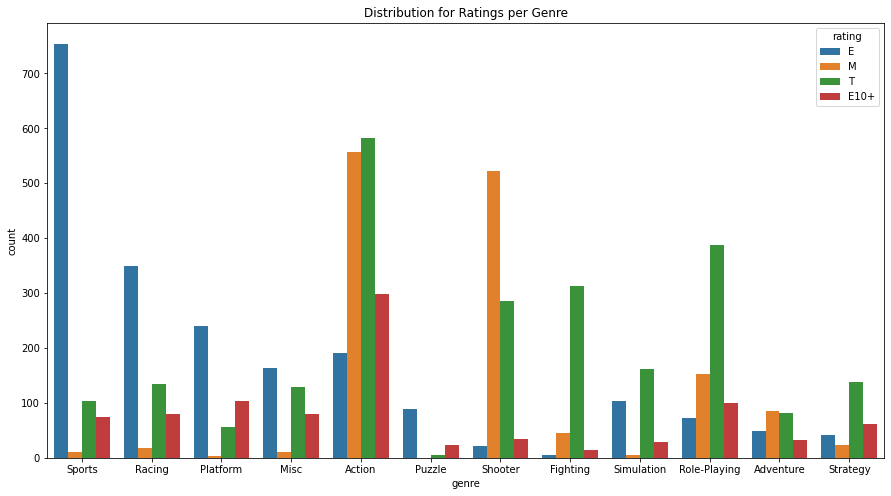

In [74]:
# Use ratings dataframe created before
plt.figure(figsize=(15,8))
sb.countplot(data=ratings_df, x='genre', hue='rating');
plt.title('Distribution for Ratings per Genre');


> Fighiting, and Role-Playing games are mostly aimed towards teens.

> Sports games are aimed towards everyone.

# Multivariate Exploration

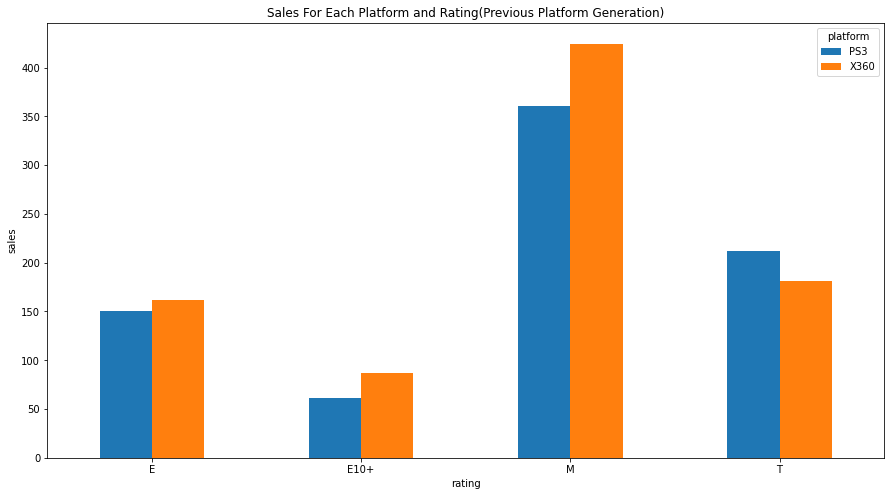

In [75]:
platform_df = ratings_df.query('platform == "PS3" or platform == "X360"')
rating_sales = platform_df.groupby(['rating','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Rating(Previous Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

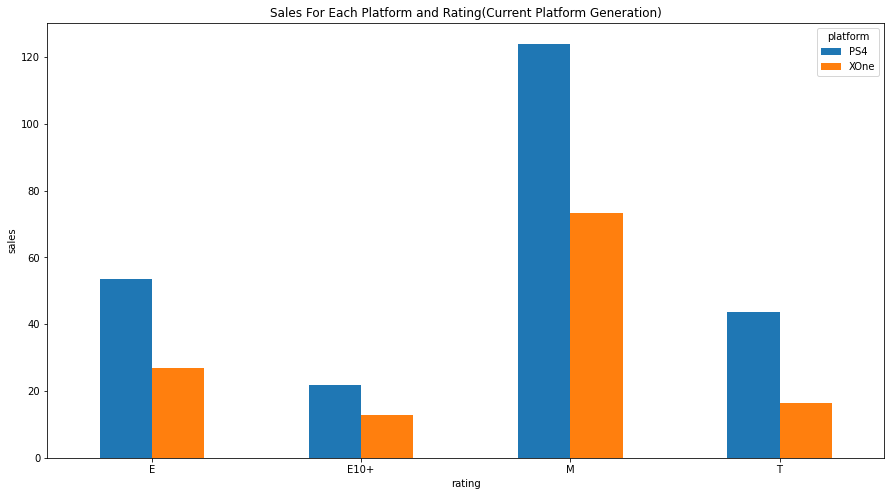

In [76]:
platform_df = ratings_df.query('platform == "PS4" or platform == "XOne"')
rating_sales = platform_df.groupby(['rating','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Rating(Current Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

> These visulas shows that the competition between Xbox 360, and PS3 was close. But in the current genration PS4 dominates the market.

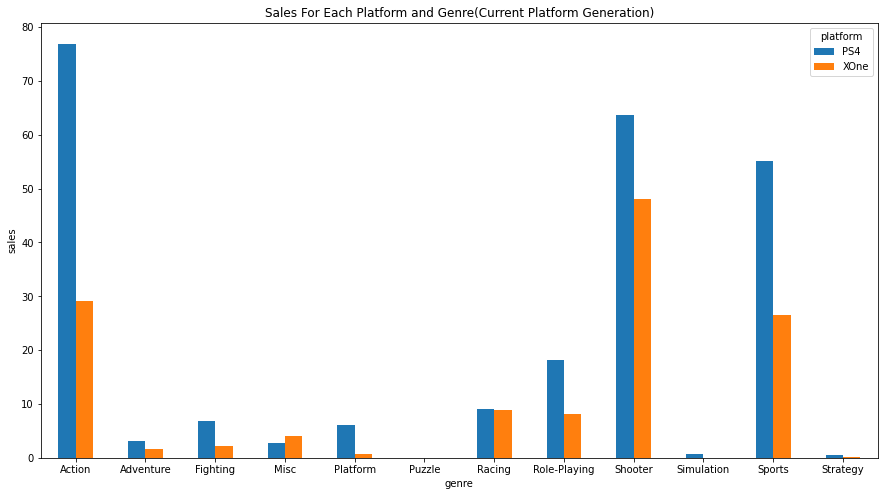

In [77]:
platform_df = ratings_df.query('platform == "PS4" or platform == "XOne"')
rating_sales = platform_df.groupby(['genre','platform']).global_sales.sum()
rating_sales.unstack().plot(kind='bar', figsize=(15,8))
plt.title('Sales For Each Platform and Genre(Current Platform Generation)')
plt.ylabel('sales');
plt.xticks(rotation = 0);

> All the popular genres sell more on PS4.


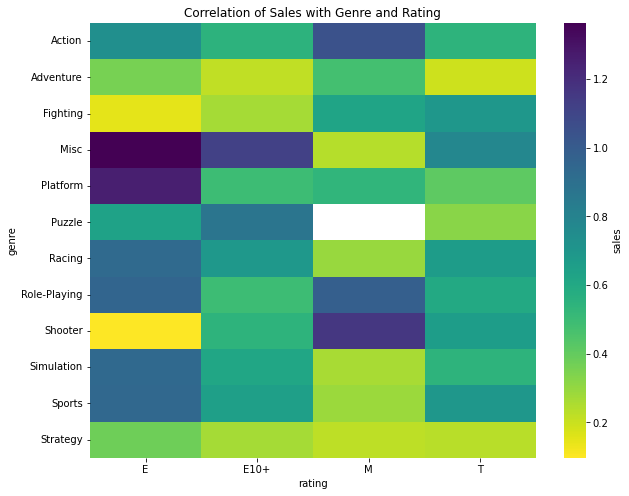

In [78]:
heatmap_data = pd.pivot_table(ratings_df, values='global_sales', index=['genre'], columns='rating')
plt.figure(figsize=(10,8))
plt.title('Correlation of Sales with Genre and Rating')
sb.heatmap(heatmap_data, cmap="viridis_r", cbar_kws={'label': 'sales'});

> We can see that misc games that rated E(for everyone) sell the highest, while puzzle games that are rated M(for mature) sell the least.

